# Data Science and Visualization (RUC F2023)

## Lecture 6: Regression

 # Polynomial Regression

## 0. Importing the Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('position_salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## 1. Does Linear Regression still work?

**Question**: Any relationship betwee Level and Salary?

We get the Level column's values and Salary columns's values into X and y respectively.

In [2]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Let's plot the data.

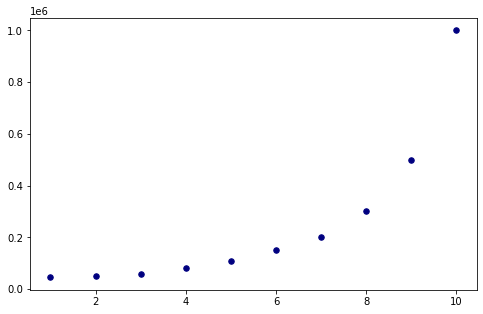

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

Clearly, there is no way to fit a linear regression model to this dataset. 

## 2. Polynomial Regression

So let's try a polynomial regressor with degree=4.

### 2.1 Data Transformation

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Create an empty polynomial function with degree of 4
poly_reg = PolynomialFeatures(degree=4)
# Fit the function to the X and transform X to the polynomial format
X_poly = poly_reg.fit_transform(X)

Notice the values in X_poly: Each row is in the format of [x^0, x^1, x^2, x^3, x^4], where x is the single value on each row of X above.

(Above: '^i' means the *i*th power.)

In [7]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### 2.2 Polynomial Regression using Linear Regression

After the transformation, we can use a linear regressor to do the polynomial regression:

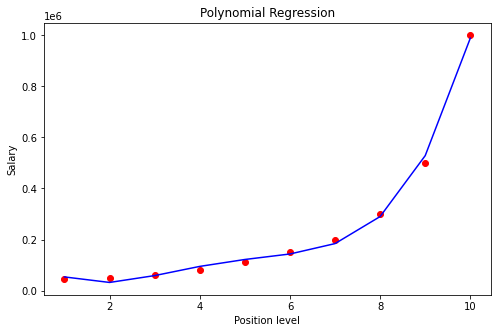

In [8]:
from sklearn.linear_model import LinearRegression

# Now we construct a Multiple Linear Regressor on the transformed X_ploy
lr_2 = LinearRegression()  
lr_2.fit(X_poly, y)  

# Get the y values using the constructed Multiple Linear Regressor
y_poly = lr_2.predict(X_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red')
    
plt.plot(X, y_poly, color='blue')
    
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 2.3 Different Degrees of Polynomial Regression

This looks much better, even perfect. We can try out different degrees.
Let's try out different degrees on the same plot.

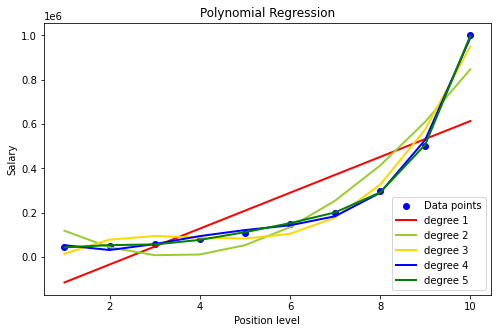

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label="Data points")

colors = ['grey', 'red', 'yellowgreen', 'gold', 'blue','green','violet']

for dg in range(1, 6):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  

    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    plt.plot(X, y_poly, color=colors[dg], linewidth=2, label="degree %d" % dg)

plt.legend(loc='lower right')
    
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Observations**:
* A large degree may help.
* But a too large degree may do the opposite.
    
**Note**:
* One may also split the data into training and validation sets, and validate a polynomial regressor.
* Again, cross-validation is also applicable.

## References

* https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

* https://www.javatpoint.com/machine-learning-polynomial-regression
    